# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 80)

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
# what are the columns?
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [7]:
# almost 5000 rows
data.shape

(4870, 65)

In [8]:
# callback rate = number of calls/number of resumes => 8%
data.call.sum()/data.shape[0]

0.080492813141683772

In [9]:
data.race.value_counts()

b    2435
w    2435
Name: race, dtype: int64

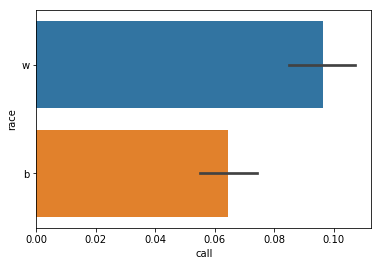

In [10]:
sns.barplot(y='race', x='call', data=data, orient='h');

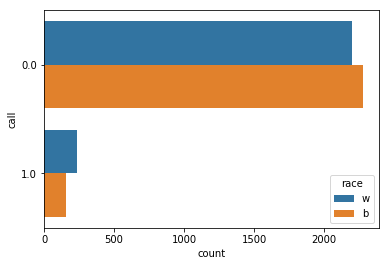

In [11]:
sns.countplot(y="call", hue="race", data=data)

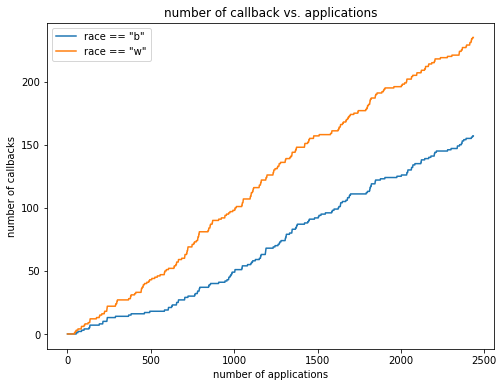

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(len(data)/2)
plt.plot(x, np.cumsum(data[data.race=='b'].call), label='race == "b"')
plt.plot(x, np.cumsum(data[data.race=='w'].call),  label='race == "w"')
plt.xlabel('number of applications')
plt.ylabel('number of callbacks')
plt.title('number of callback vs. applications')
plt.legend();

### Q1. What test is appropriate for this problem? Does CLT apply?

This is a question of difference of proportion.  The Central Limit Theorm applies because the sample is large.  

One way to think about this is as if there are two experiments.  In the first, 2435 resumes are sent out with white-sounding names.  In the second, 2435 resumes are sent with black-sounding names.  In the first instance, there are 235 responses (9.7% response rate).  In the second, there are 157 (6.4% response rate).

In both sub-experiments the samples are large enough to estimate the mean response rate in the general population.  For purposes of contrasting the two response rates, the samples of positive responses are large enough for CLT to apply.

### Q2. What are the null and alternate hypotheses?

#### The Hypothesis

$H_0$: The null hypothesis is that there is no difference between callback rate for whites and blacks.

$H_A$:The alternative hypothesis is that there is a statistical difference between callback rate for whites and blacks.

### Q3. Compute margin of error, confidence interval, and p-value.

In [13]:
numCallsReqW = data[data.race == 'w'].call.sum()
numCallsReqB = data[data.race == 'b'].call.sum()
numReqW = len(data[data.race == 'w'])
numReqB = len(data[data.race == 'b'])
print('Number of applications with "white-sounding" names: ' + str(numReqW))
print('Number of applications with "black-sounding" names: ' + str(numReqB))
print('Number of callbacks with "white-sounding" names: ' + str(numCallsReqW))
print('Number of callbacks with "black-sounding" names: ' + str(numCallsReqB))

Number of applications with "white-sounding" names: 2435
Number of applications with "black-sounding" names: 2435
Number of callbacks with "white-sounding" names: 235.0
Number of callbacks with "black-sounding" names: 157.0


In [14]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([157, 235], [2435, 2435])

C:\Users\saus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
print('p-value: {:4.6f}, z-score: {:4.4f}'.format(p_value, z_score))

p-value: 0.000040, z-score: -4.1084


##### margin of error, confidence interval for rate of callbacks for white sounding names

In [16]:
# proportion of callbacks for white sounding names
p_hat_w = numCallsReqW / numReqW; p_hat_w

0.096509240246406572

In [17]:
1/p_hat_w

10.361702127659575

In [18]:
# standard error of proportion of callbacks for white sounding names
se_p_hat_w = np.sqrt( (p_hat_w * (1 - p_hat_w))/numReqW ); se_p_hat_w

0.0059840721781280661

In [19]:
# 95% confidence interval for proportion of callbacks for white sounding names
print('95% confidence interval [{:4.4f}%, {:4.4f}%]'.format(100 * (p_hat_w - 2 * se_p_hat_w), 100 * (p_hat_w + 2 * se_p_hat_w)))

95% confidence interval [8.4541%, 10.8477%]


##### margin of error, confidence interval for rate of callbacks for black sounding names

In [20]:
# proportion of callbacks for black sounding names
p_hat_b = numCallsReqB / numReqB; p_hat_b

0.064476386036960986

In [21]:
1/p_hat_b

15.509554140127388

In [22]:
# standard error of proportion of callbacks for black sounding names
se_p_hat_b = np.sqrt( (p_hat_b * (1 - p_hat_b))/numReqB ); se_p_hat_b

0.0049771214428119461

In [23]:
# 95% confidence interval for proportion of callbacks for black sounding names
print('95% confidence interval [{:4.4f}%, {:4.4f}%]'.format(100 * (p_hat_b - 2 * se_p_hat_b), 100 * (p_hat_b + 2 * se_p_hat_b)))

95% confidence interval [5.4522%, 7.4431%]


##### margin of error, confidence interval for difference in the rate of callbacks for black and white sounding names

In [24]:
p_hat_wMinusB = p_hat_w - p_hat_b; p_hat_wMinusB

0.032032854209445585

In [25]:
se_p_hat_wMinusB = np.sqrt( (p_hat_w * (1 - p_hat_w))/numReqW + 
                            (p_hat_b * (1 - p_hat_b))/numReqB)   ; se_p_hat_wMinusB

0.0077833705866767544

In [26]:
# 95% confidence interval for difference in the rate of callbacks for black and white sounding names
print('95% confidence interval [{:4.4f}%, {:4.4f}%]'.format(100 * (p_hat_wMinusB - 2 * se_p_hat_wMinusB),
                                                            100 * (p_hat_wMinusB + 2 * se_p_hat_wMinusB)))

95% confidence interval [1.6466%, 4.7600%]


### Q4. Write a story describing the statistical significance in the context of the original problem.

There are several conclusions that can be drawn from the above statistics:

1. For all applicants (without including race as a parameter), about 8% of resumes receive a call back.
1. For applicants with 'white-sounding' names the response rate is around 9.5% with a 95% confidence interval of [8.4541%, 10.8477%]
1. For applicants with 'black-sounding' names the response rate is around 6.5% with a 95% confidence interval of [5.4522%, 7.4431%]

The data show that there is statisically signifcant difference between the response rates for applicants with 'white-sounding' and  'black-sounding' names (p-value: 0.000040).

The data give an estimate for the difference of 3.2% with 95% confidence that the actual rate is between 4.8% and 1.6%.

### Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis show that race is a very significant factor in callback success. On average, applicants with white-sounding names need to send out about 10 resumes to get one response; in contrast, applicants with black-sounding names need to send out about 15 resumes to get one response.

The dataset includes many other columns which have been ignored in the study above.

If the goal were to establish what factors are most important for callback success, the impact of the other data should be examined.